In [131]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Last Letters
Analyze which last letters appear most frequently in first names.

#### Task 1

In [53]:
data_frames = []

for file in os.listdir('./name_data/'):
    if file.endswith('.txt'):
        file_path = os.path.join('./name_data/', file)

        df = pd.read_csv(file_path, header=None, sep=',')
        df.columns = ['name', 'gender', 'number']
        year = int(file[3:7])
        df['year'] = year

        data_frames.append(df)

df_all = pd.concat(data_frames, ignore_index=True)

#### Task 2

In [59]:
df_all['last_letter'] = df_all['name'].str[-1]

#### Task 3

In [62]:
last_letter_counts = df_all['last_letter'].value_counts()
last_letter_counts

last_letter
a    536610
e    369826
n    352873
y    142958
l    113147
i     94669
h     87887
s     86690
o     74045
r     71286
d     50075
t     38175
m     22714
k     19892
g      8161
z      8135
c      7193
u      6706
b      5199
x      4841
f      4186
w      3541
p      2753
v      2557
j      2254
q       846
Name: count, dtype: int64

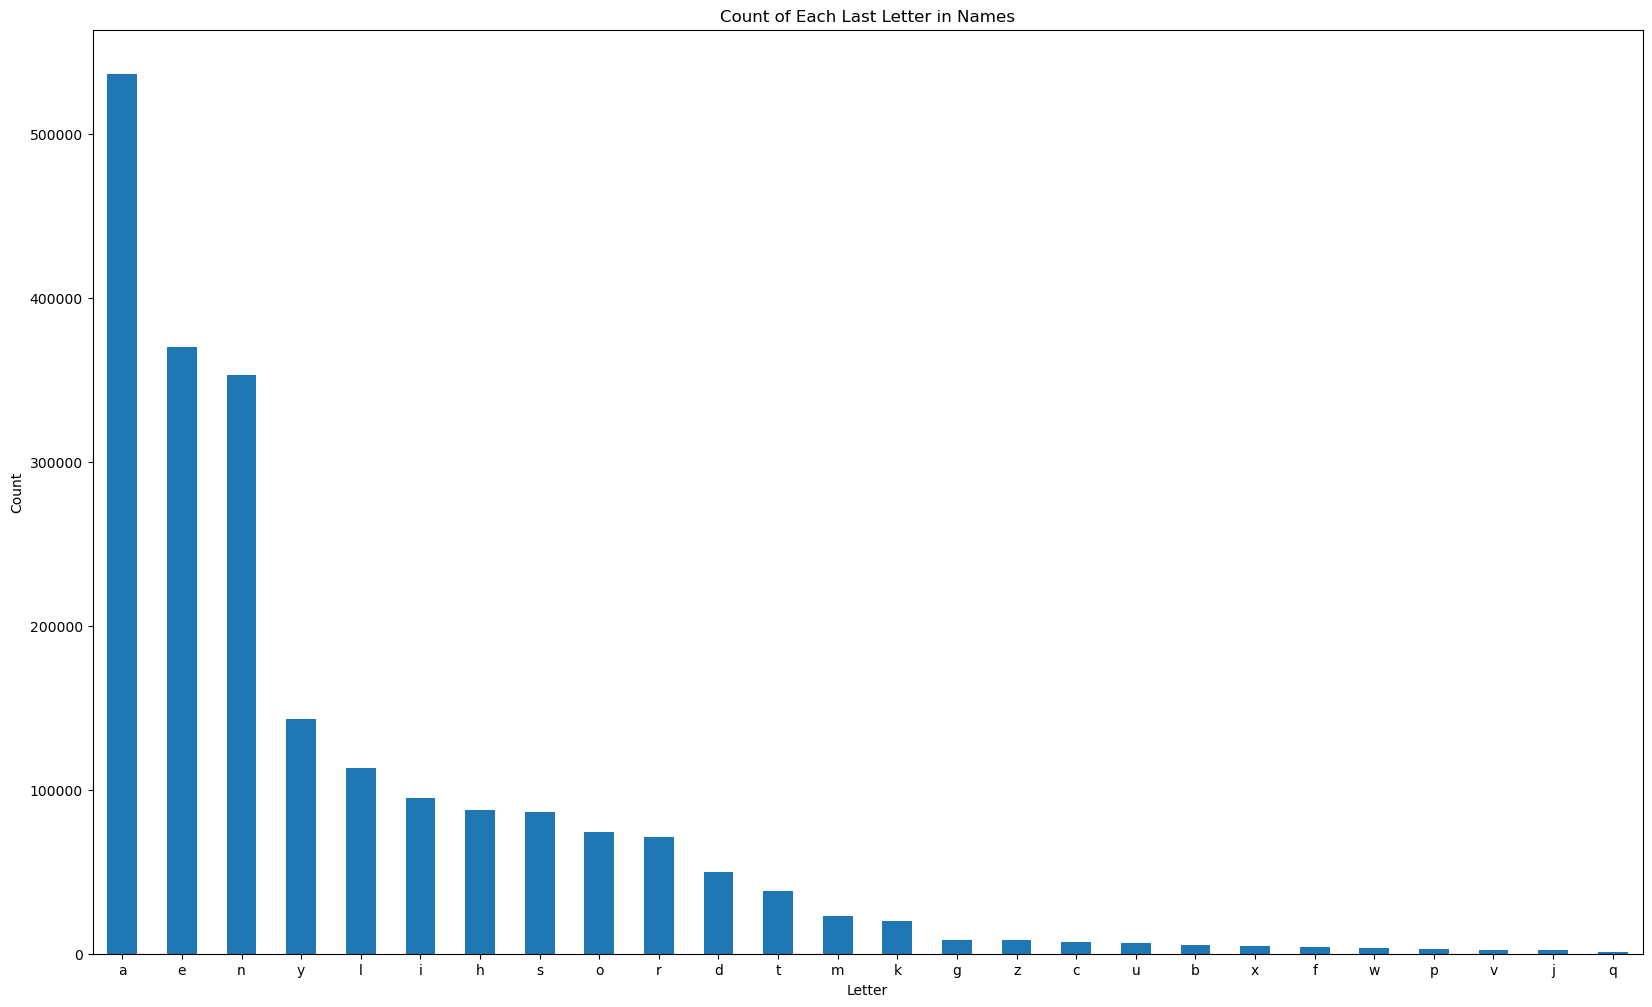

In [66]:
plt.figure(figsize=(20, 12))
last_letter_counts.plot(kind='bar')
plt.title('Count of Each Last Letter in Names')
plt.xlabel('Letter')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


#### Task 4

In [83]:
df_l = df_all[df_all['last_letter'] == 'l']
df_timeline = df_l.groupby('year').size().reset_index(name='count')
df_timeline

,year,count
0,1880,98
1,1881,97
2,1882,108
3,1883,107
4,1884,108
...,...,...
139,2019,1328
140,2020,1286
141,2021,1291
142,2022,1315


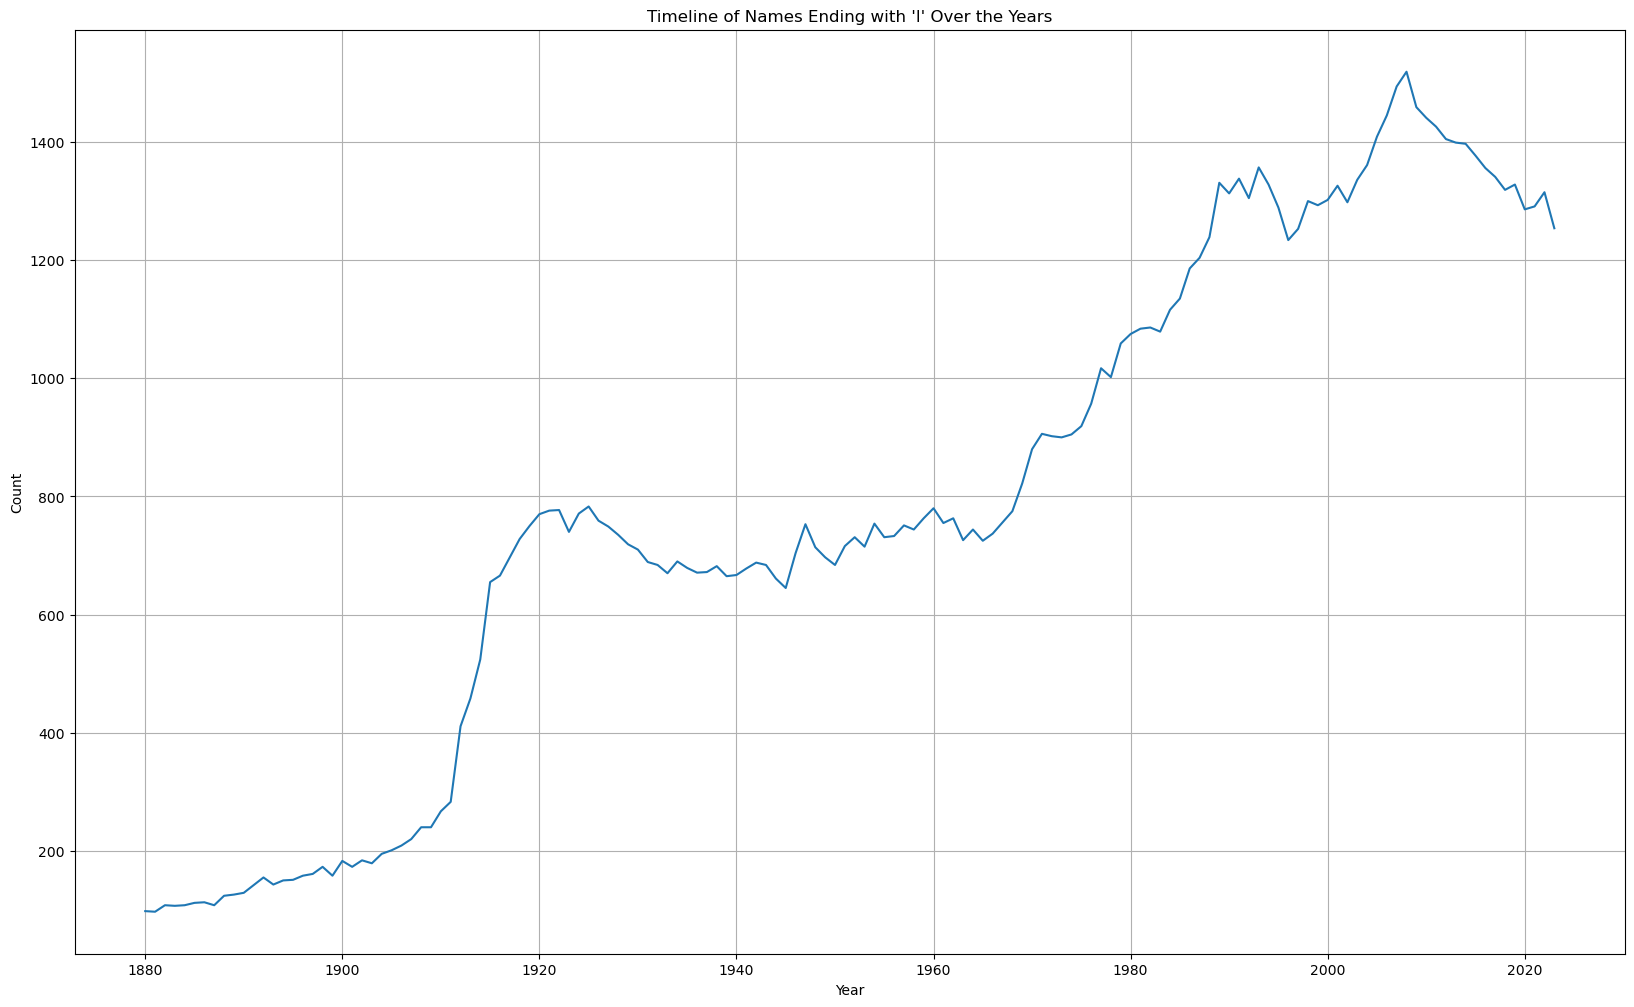

In [110]:
plt.figure(figsize=(20, 12))
plt.plot(df_timeline['year'], df_timeline['count'])
plt.title("Timeline of Names Ending with 'l' Over the Years")
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#### Task 5

In [94]:
df_name_count = df_all.groupby(['last_letter', 'year'])['name'].count()
df_name_count

last_letter  year
a            1880    450
             1881    432
             1882    478
             1883    480
             1884    543
                    ... 
z            2019    155
             2020    163
             2021    159
             2022    157
             2023    164
Name: name, Length: 3582, dtype: int64

In [96]:
df_crosstable = df_name_count.unstack(0)
df_crosstable

last_letter,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
year,,,,,,,,,,,,,,,,,,,,,
1880,450.0,7.0,7.0,93.0,490.0,7.0,9.0,60.0,7.0,NaN,...,NaN,89.0,125.0,76.0,5.0,1.0,7.0,4.0,148.0,4.0
1881,432.0,6.0,8.0,85.0,484.0,5.0,13.0,59.0,6.0,NaN,...,NaN,83.0,116.0,78.0,4.0,1.0,7.0,5.0,142.0,2.0
1882,478.0,7.0,8.0,96.0,538.0,8.0,10.0,70.0,6.0,NaN,...,NaN,87.0,124.0,83.0,3.0,1.0,8.0,5.0,167.0,4.0
1883,480.0,5.0,8.0,96.0,542.0,7.0,10.0,61.0,4.0,NaN,...,NaN,86.0,122.0,79.0,4.0,1.0,9.0,6.0,151.0,2.0
1884,543.0,10.0,7.0,101.0,584.0,6.0,10.0,72.0,4.0,NaN,...,NaN,100.0,133.0,83.0,4.0,1.0,7.0,4.0,179.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,6546.0,114.0,110.0,526.0,3971.0,73.0,99.0,2412.0,2660.0,71.0,...,22.0,1426.0,1196.0,472.0,158.0,87.0,52.0,170.0,2035.0,155.0
2020,6325.0,115.0,113.0,502.0,3893.0,75.0,97.0,2365.0,2732.0,70.0,...,25.0,1413.0,1164.0,482.0,158.0,75.0,51.0,185.0,2001.0,163.0
2021,6401.0,109.0,97.0,521.0,3926.0,74.0,90.0,2299.0,2813.0,64.0,...,24.0,1453.0,1198.0,489.0,159.0,84.0,56.0,193.0,2037.0,159.0


<Figure size 2000x1200 with 0 Axes>

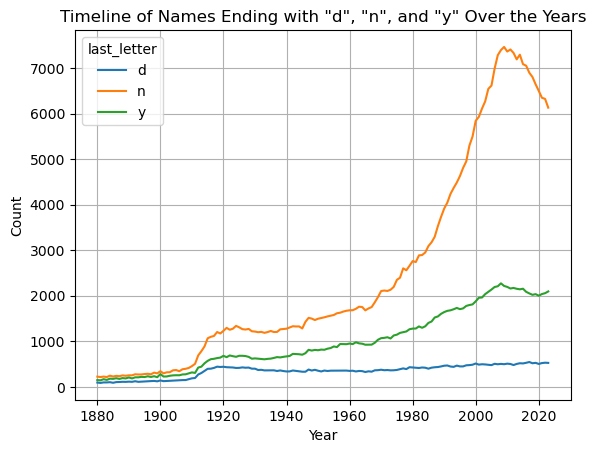

In [104]:
plt.figure(figsize=(20, 12))
df_crosstable[['d', 'n', 'y']].plot(kind='line')
plt.title('Timeline of Names Ending with "d", "n", and "y" Over the Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#### Task 6

In [147]:
df_all['name'] = df_all['name'].str.lower()
df_all['first_letter'] = df_all['name'].str[0]

df_cross_first_last = df_all.groupby(['first_letter', 'last_letter'])['name'].count()
df_crosstable = df_cross_first_last.unstack(0)

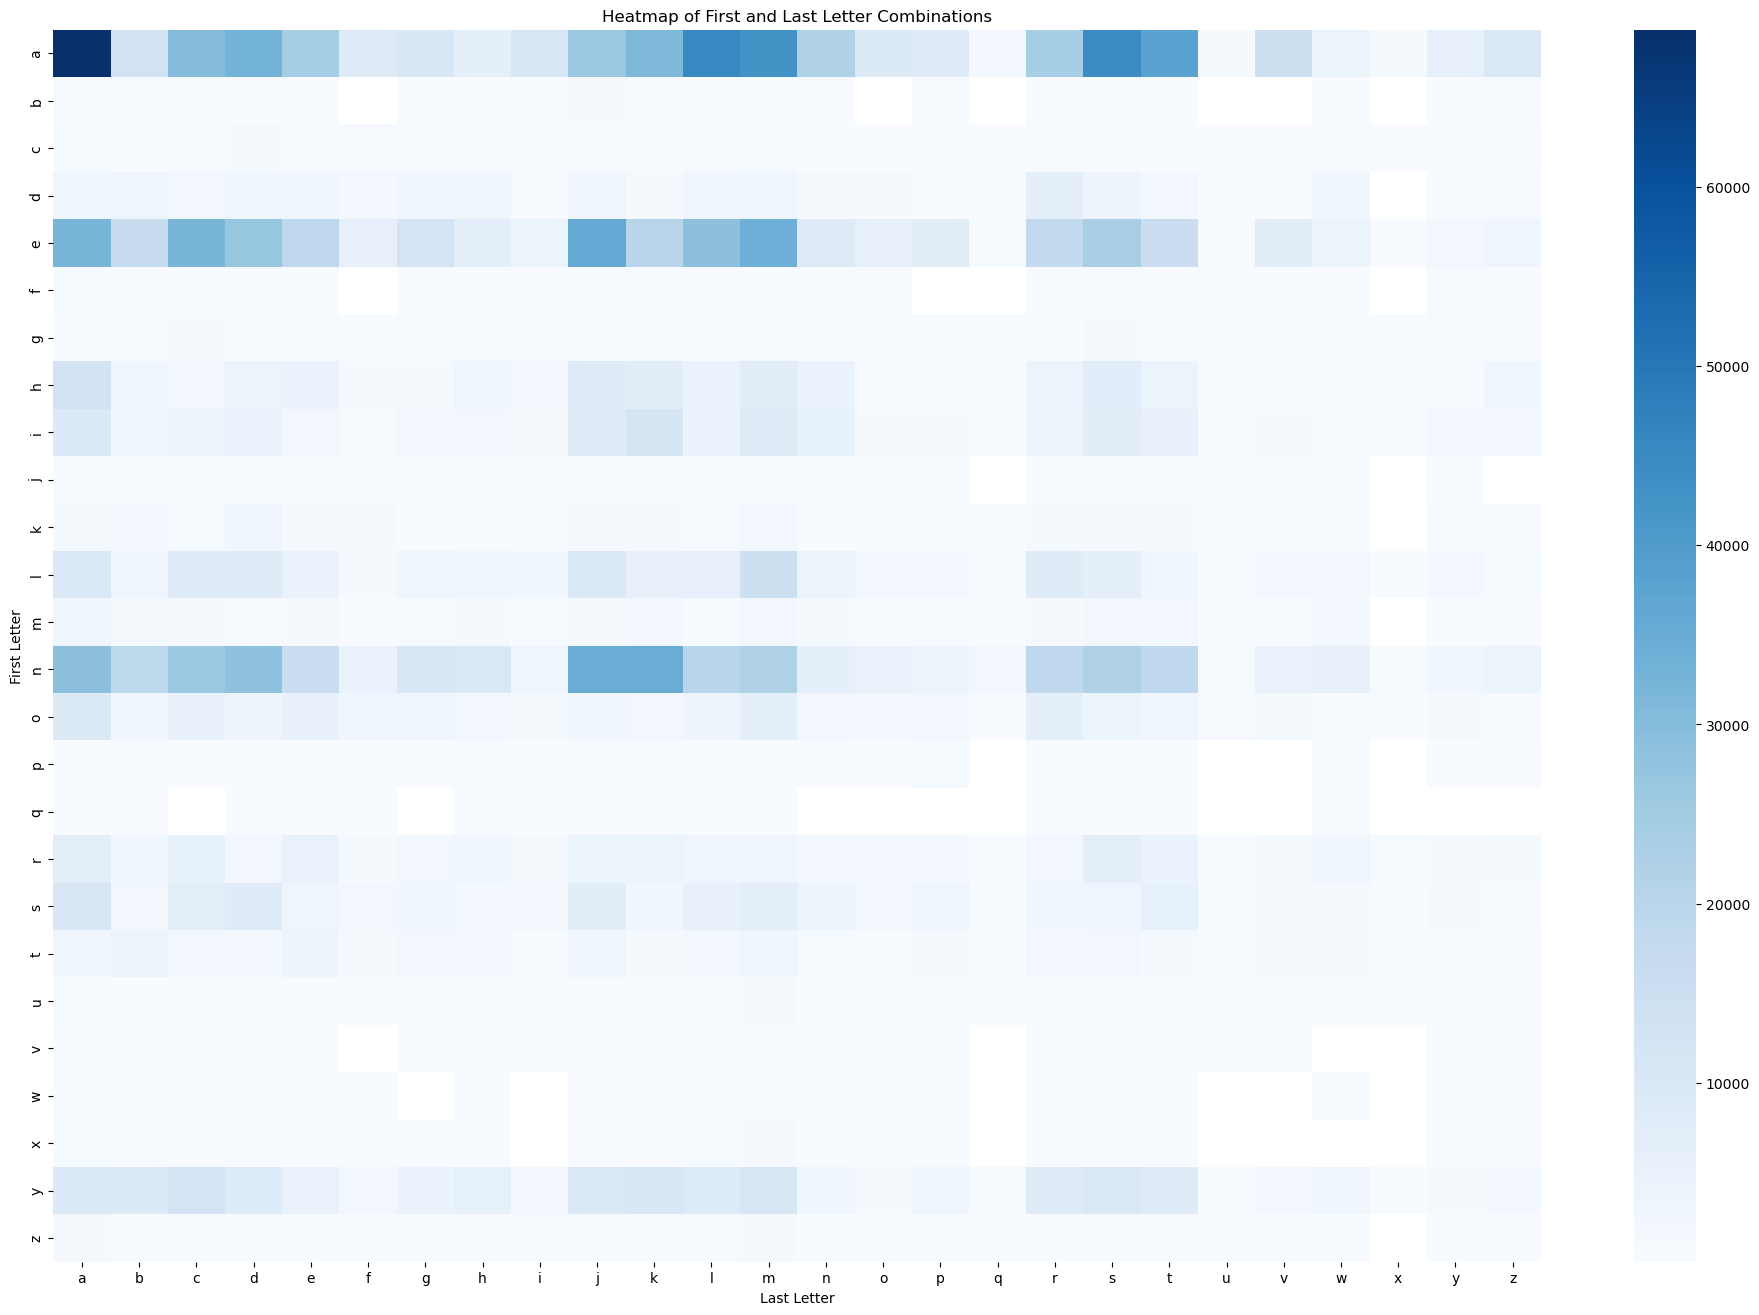

In [151]:
plt.figure(figsize=(24, 16))
sns.heatmap(df_crosstable, cmap='Blues', annot=False)
plt.title('Heatmap of First and Last Letter Combinations')
plt.xlabel('Last Letter')
plt.ylabel('First Letter')
plt.show()

#### Task 7

In [156]:
plt.savefig('heatmap_letters.png', dpi=150)

<Figure size 640x480 with 0 Axes>